In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb
from matplotlib import rc

%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_excel(r'전체동.xlsx')
df

,Unnamed: 0,동,자치구,출생,사망,전입,전출,혼인,이혼,cluster,주민센터 이름,주민센터 주소,위도,경도
0,0,개포1동,강남구,17,29,829,937,12,13,1,개포1동 주민센터,서울특별시 강남구 개포로 310-17,37.481054,127.053708
1,1,개포2동,강남구,152,57,9853,4191,61,28,0,개포2동 주민센터,서울특별시 강남구 개포로 511,37.489774,127.069120
2,2,개포4동,강남구,91,57,4408,3308,91,41,2,개포4동 주민센터,서울특별시 강남구 개포로38길 12,37.478999,127.051657
3,3,논현1동,강남구,93,81,5141,5967,112,45,0,논현1동 주민센터,서울특별시 강남구 학동로20길 25,37.511555,127.028446
4,4,논현2동,강남구,102,76,4171,4824,87,40,2,논현2동 주민센터,서울특별시 강남구 학동로43길 17,37.517375,127.037196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,422,상봉2동,중랑구,126,96,4437,4029,160,44,2,상봉2동 주민센터,서울특별시 중랑구 봉우재로 93-5,37.589362,127.074210
421,423,신내1동,중랑구,183,249,3719,4709,95,49,2,신내1동 주민센터,서울특별시 중랑구 용마산로129나길 35,37.605930,127.099529
422,424,신내2동,중랑구,132,139,2182,2903,74,39,1,신내2동 주민센터,서울특별시 중랑구 봉화산로 190,37.606256,127.094209
423,425,중화1동,중랑구,131,118,2619,3157,98,34,1,중화1동 주민센터,서울특별시 중랑구 동일로134길 17,37.601147,127.080641


In [4]:
df.drop(['Unnamed: 0','자치구','주민센터 이름','주민센터 주소','동','cluster'], inplace=True, axis=1)
df

,출생,사망,전입,전출,혼인,이혼,위도,경도
0,17,29,829,937,12,13,37.481054,127.053708
1,152,57,9853,4191,61,28,37.489774,127.069120
2,91,57,4408,3308,91,41,37.478999,127.051657
3,93,81,5141,5967,112,45,37.511555,127.028446
4,102,76,4171,4824,87,40,37.517375,127.037196
...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,37.589362,127.074210
421,183,249,3719,4709,95,49,37.605930,127.099529
422,132,139,2182,2903,74,39,37.606256,127.094209
423,131,118,2619,3157,98,34,37.601147,127.080641


## elbow

In [5]:
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()

C:\Users\MEDICI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


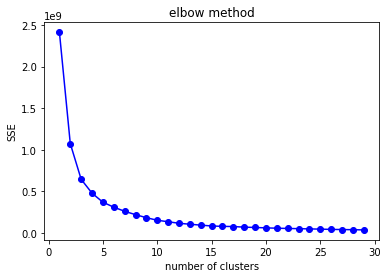

In [6]:
elbow(df,30)

## 실루엣

In [7]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

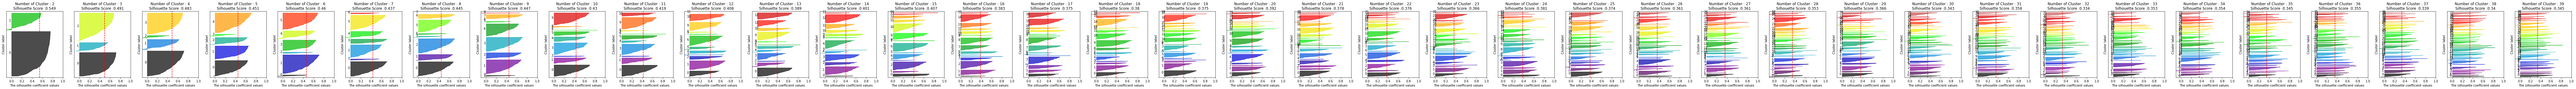

In [8]:
a = list(range(2,40))
visualize_silhouette(a, df)

#### elbow 에서는 3 혹은 4
#### 실루엣에서는 8~??

In [9]:
df.corr()

,출생,사망,전입,전출,혼인,이혼,위도,경도
출생,1.000000,0.448801,0.586982,0.620247,0.732811,0.535335,-0.106792,-0.046106
사망,0.448801,1.000000,0.355549,0.475607,0.483957,0.772915,0.276788,-0.090515
전입,0.586982,0.355549,1.000000,0.795452,0.650317,0.544853,-0.180591,0.002452
전출,0.620247,0.475607,0.795452,1.000000,0.706843,0.619729,-0.181488,-0.005353
혼인,0.732811,0.483957,0.650317,0.706843,1.000000,0.665452,-0.124434,-0.104004
이혼,0.535335,0.772915,0.544853,0.619729,0.665452,1.000000,0.120251,-0.050919
위도,-0.106792,0.276788,-0.180591,-0.181488,-0.124434,0.120251,1.000000,0.224682
경도,-0.046106,-0.090515,0.002452,-0.005353,-0.104004,-0.050919,0.224682,1.000000


In [10]:
import seaborn as sns

C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51077 missing from curre

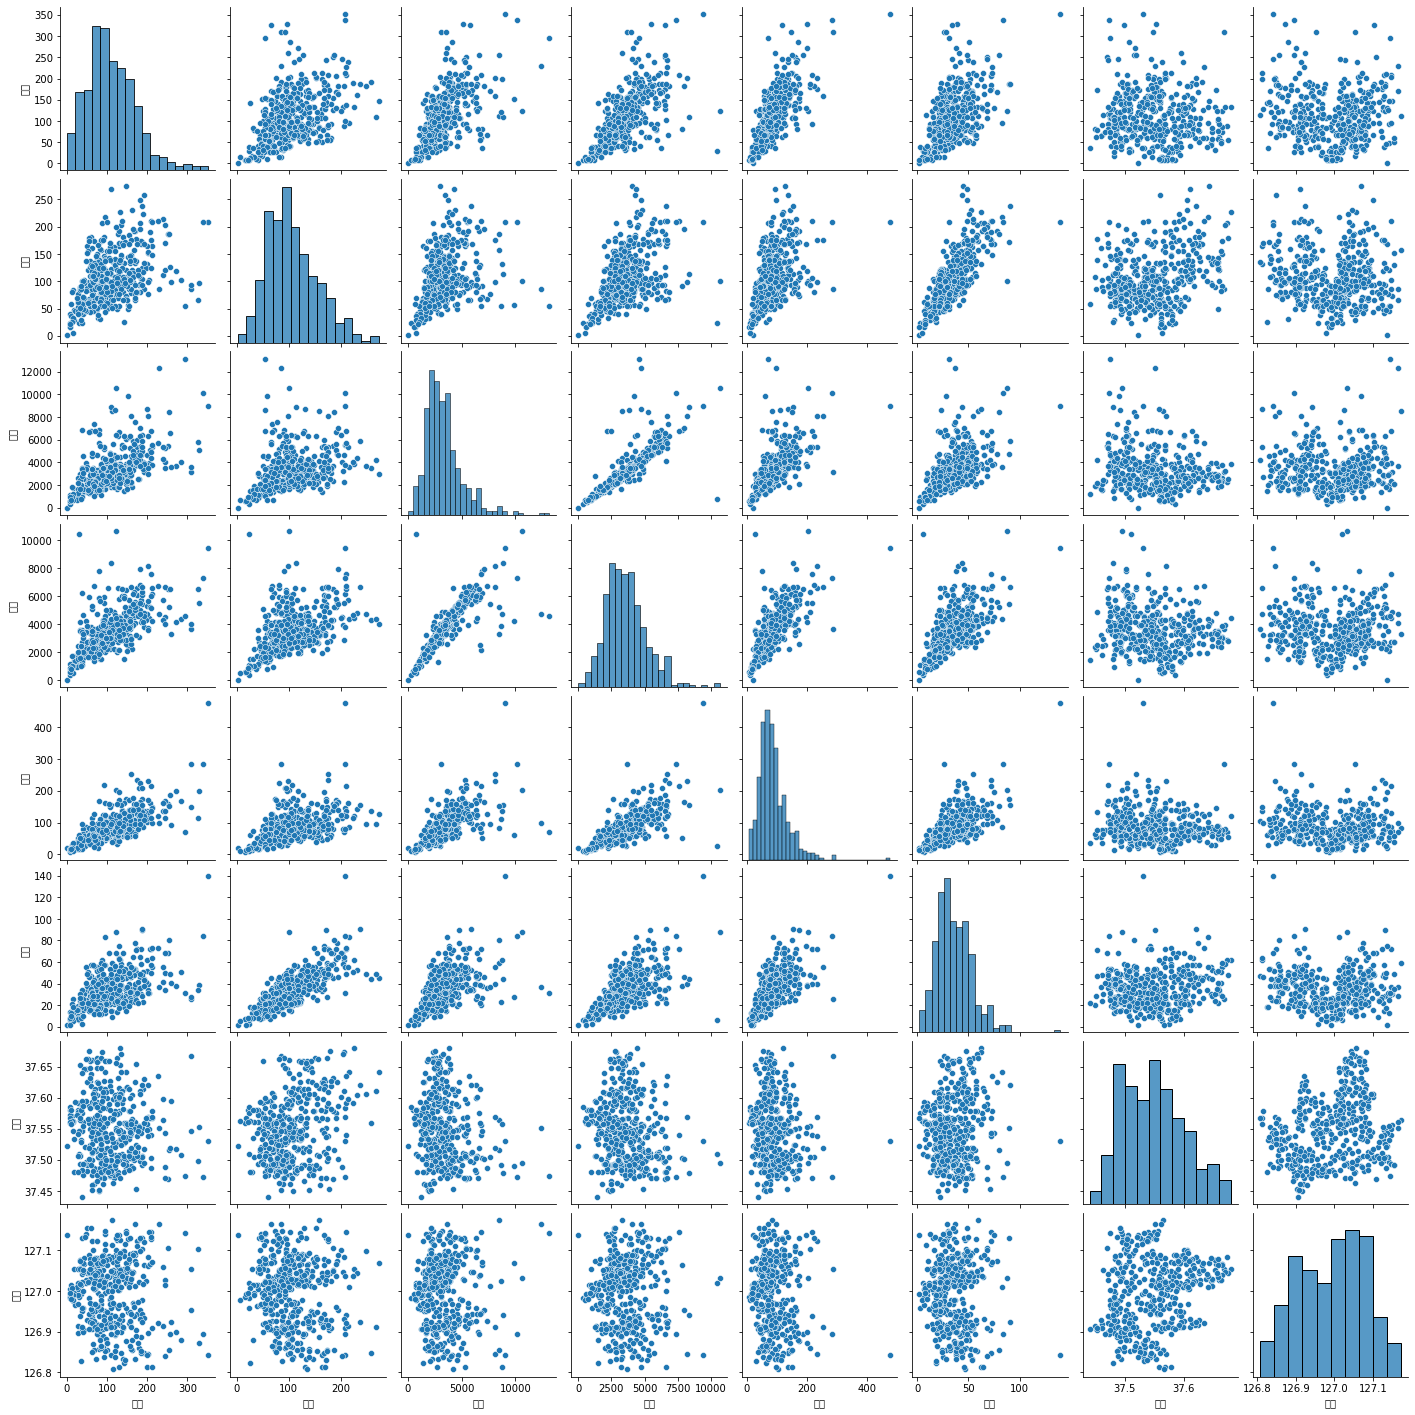

In [11]:
sns.pairplot(df)

C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

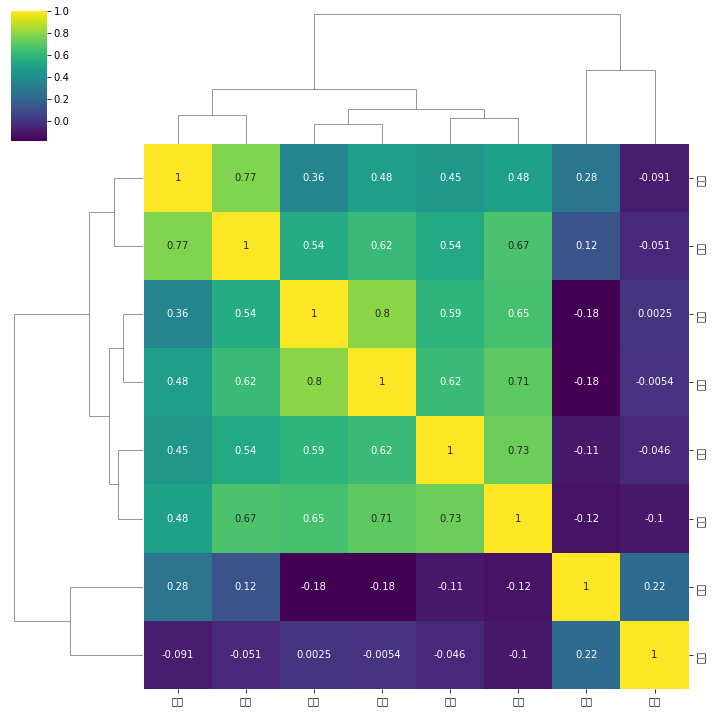

In [12]:
sns.clustermap(df.corr(), annot=True, cmap='viridis')

## k-menas

In [13]:
in_col = ['출생', '사망', '전입', '전출', '혼인', '이혼']
df_kmean = df[in_col]

In [14]:
df_kmean

,출생,사망,전입,전출,혼인,이혼
0,17,29,829,937,12,13
1,152,57,9853,4191,61,28
2,91,57,4408,3308,91,41
3,93,81,5141,5967,112,45
4,102,76,4171,4824,87,40
...,...,...,...,...,...,...
420,126,96,4437,4029,160,44
421,183,249,3719,4709,95,49
422,132,139,2182,2903,74,39
423,131,118,2619,3157,98,34


In [15]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(df_kmean)

KMeans(n_clusters=3, random_state=1234)

In [16]:
kmeans.cluster_centers_

array([[  72.07784431,   83.01796407, 1893.56287425, 2198.98802395,
          55.19760479,   25.23353293],
       [ 173.26666667,  135.        , 6664.85      , 6140.33333333,
         148.66666667,   51.36666667],
       [ 126.32323232,  118.97979798, 3545.81313131, 3983.73232323,
          95.32323232,   38.74242424]])

In [17]:
kmeans.labels_

array([0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0,
       2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 1,
       0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2,

In [18]:
df_kmean['cluster'] = kmeans.labels_
df_kmean

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_16912/2619916968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmean['cluster'] = kmeans.labels_


,출생,사망,전입,전출,혼인,이혼,cluster
0,17,29,829,937,12,13,0
1,152,57,9853,4191,61,28,1
2,91,57,4408,3308,91,41,2
3,93,81,5141,5967,112,45,1
4,102,76,4171,4824,87,40,2
...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2
421,183,249,3719,4709,95,49,2
422,132,139,2182,2903,74,39,0
423,131,118,2619,3157,98,34,0


In [19]:
df_kmean['cluster'].value_counts()

2    198
0    167
1     60
Name: cluster, dtype: int64

C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

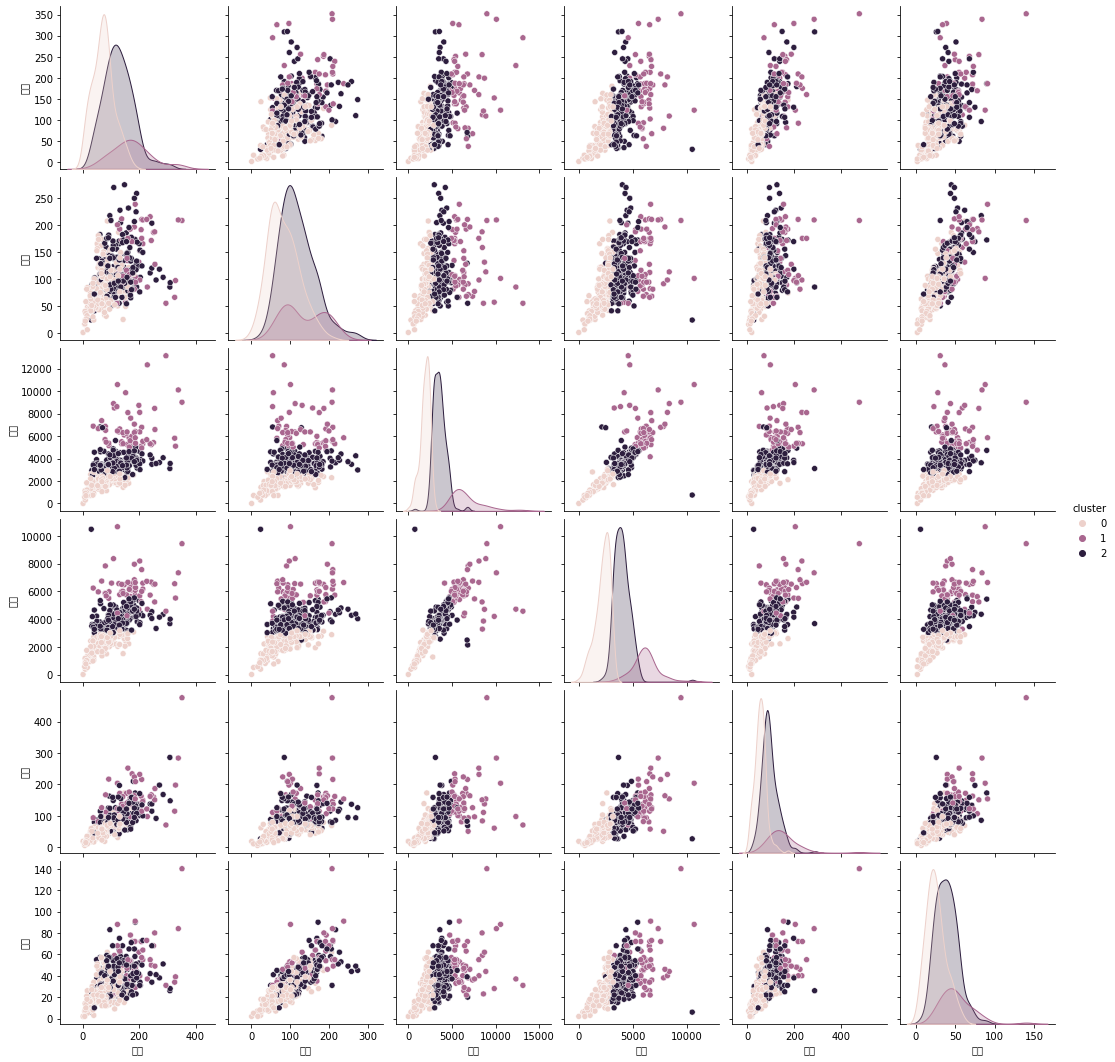

In [20]:
sns.pairplot(df_kmean, hue="cluster")

In [21]:
df_f = df.copy()
df_f.drop(["위도","경도"],axis=1, inplace=True)
df_f

,출생,사망,전입,전출,혼인,이혼
0,17,29,829,937,12,13
1,152,57,9853,4191,61,28
2,91,57,4408,3308,91,41
3,93,81,5141,5967,112,45
4,102,76,4171,4824,87,40
...,...,...,...,...,...,...
420,126,96,4437,4029,160,44
421,183,249,3719,4709,95,49
422,132,139,2182,2903,74,39
423,131,118,2619,3157,98,34


### scaling

In [22]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
standard_scaler = StandardScaler() 
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df_f.iloc[:,0:6]), columns=df_f.iloc[:,0:6].columns)

In [23]:
kmeans.fit(scaled_df) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(scaled_df)

In [24]:
df_kmean['cluster_s'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
0,17,29,829,937,12,13,0,0
1,152,57,9853,4191,61,28,1,1
2,91,57,4408,3308,91,41,2,1
3,93,81,5141,5967,112,45,1,1
4,102,76,4171,4824,87,40,2,1
...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1
421,183,249,3719,4709,95,49,2,2
422,132,139,2182,2903,74,39,0,1
423,131,118,2619,3157,98,34,0,1


In [25]:
df_kmean['cluster_s'].value_counts()

1    199
0    140
2     86
Name: cluster_s, dtype: int64

In [26]:
df_kmean.describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,111.635294,107.110588,3336.910588,3586.894118,87.087059,35.216471,1.072941,0.872941
std,61.458846,48.499023,1800.702209,1561.527677,49.019196,17.134738,0.924941,0.718914
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.000000
25%,68.000000,71.000000,2158.000000,2549.000000,56.000000,23.000000,0.000000,0.000000
50%,102.000000,100.000000,2965.000000,3389.000000,78.000000,33.000000,1.000000,1.000000
75%,148.000000,136.000000,4021.000000,4334.000000,108.000000,46.000000,2.000000,1.000000
max,352.000000,274.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.000000


In [27]:
df_kmean[df_kmean["cluster_s"] == 0].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0
mean,61.800000,65.257143,1940.478571,2219.414286,47.314286,19.464286,0.328571,0.0
std,34.106098,26.403175,829.072347,1051.988579,18.924722,7.682935,0.743730,0.0
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.0
25%,36.000000,50.000000,1528.750000,1670.500000,35.000000,15.000000,0.000000,0.0
50%,61.000000,63.000000,1868.000000,2204.500000,48.000000,20.000000,0.000000,0.0
75%,83.250000,84.000000,2381.250000,2632.500000,61.250000,25.000000,0.000000,0.0
max,152.000000,165.000000,6807.000000,10467.000000,103.000000,41.000000,2.000000,0.0


In [28]:
df_kmean[df_kmean["cluster_s"] == 1].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0
mean,113.613065,116.256281,3333.919598,3696.753769,87.231156,38.145729,1.452261,1.0
std,38.555824,32.778098,1097.963976,855.480239,24.891417,10.336455,0.868345,0.0
min,37.000000,50.000000,1678.000000,2137.000000,40.000000,19.000000,0.000000,1.0
25%,84.500000,92.500000,2628.000000,3070.000000,69.500000,30.000000,0.500000,1.0
50%,109.000000,112.000000,3176.000000,3623.000000,82.000000,38.000000,2.000000,1.0
75%,139.000000,139.000000,3772.500000,4142.500000,99.000000,45.500000,2.000000,1.0
max,260.000000,208.000000,9853.000000,7825.000000,173.000000,68.000000,2.000000,1.0


In [29]:
df_kmean[df_kmean["cluster_s"] == 2].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,188.186047,154.081395,5617.093023,5558.813953,151.500000,54.081395,1.406977,2.0
std,58.718173,52.698748,1941.667262,1267.345837,56.159385,18.173811,0.494152,0.0
min,67.000000,55.000000,2980.000000,3277.000000,71.000000,26.000000,1.000000,2.0
25%,154.250000,105.250000,4261.000000,4587.000000,119.500000,42.000000,1.000000,2.0
50%,183.000000,165.000000,5308.000000,5444.000000,139.500000,51.000000,1.000000,2.0
75%,212.250000,192.750000,6364.000000,6270.500000,167.000000,64.750000,2.000000,2.0
max,352.000000,274.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.0


C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

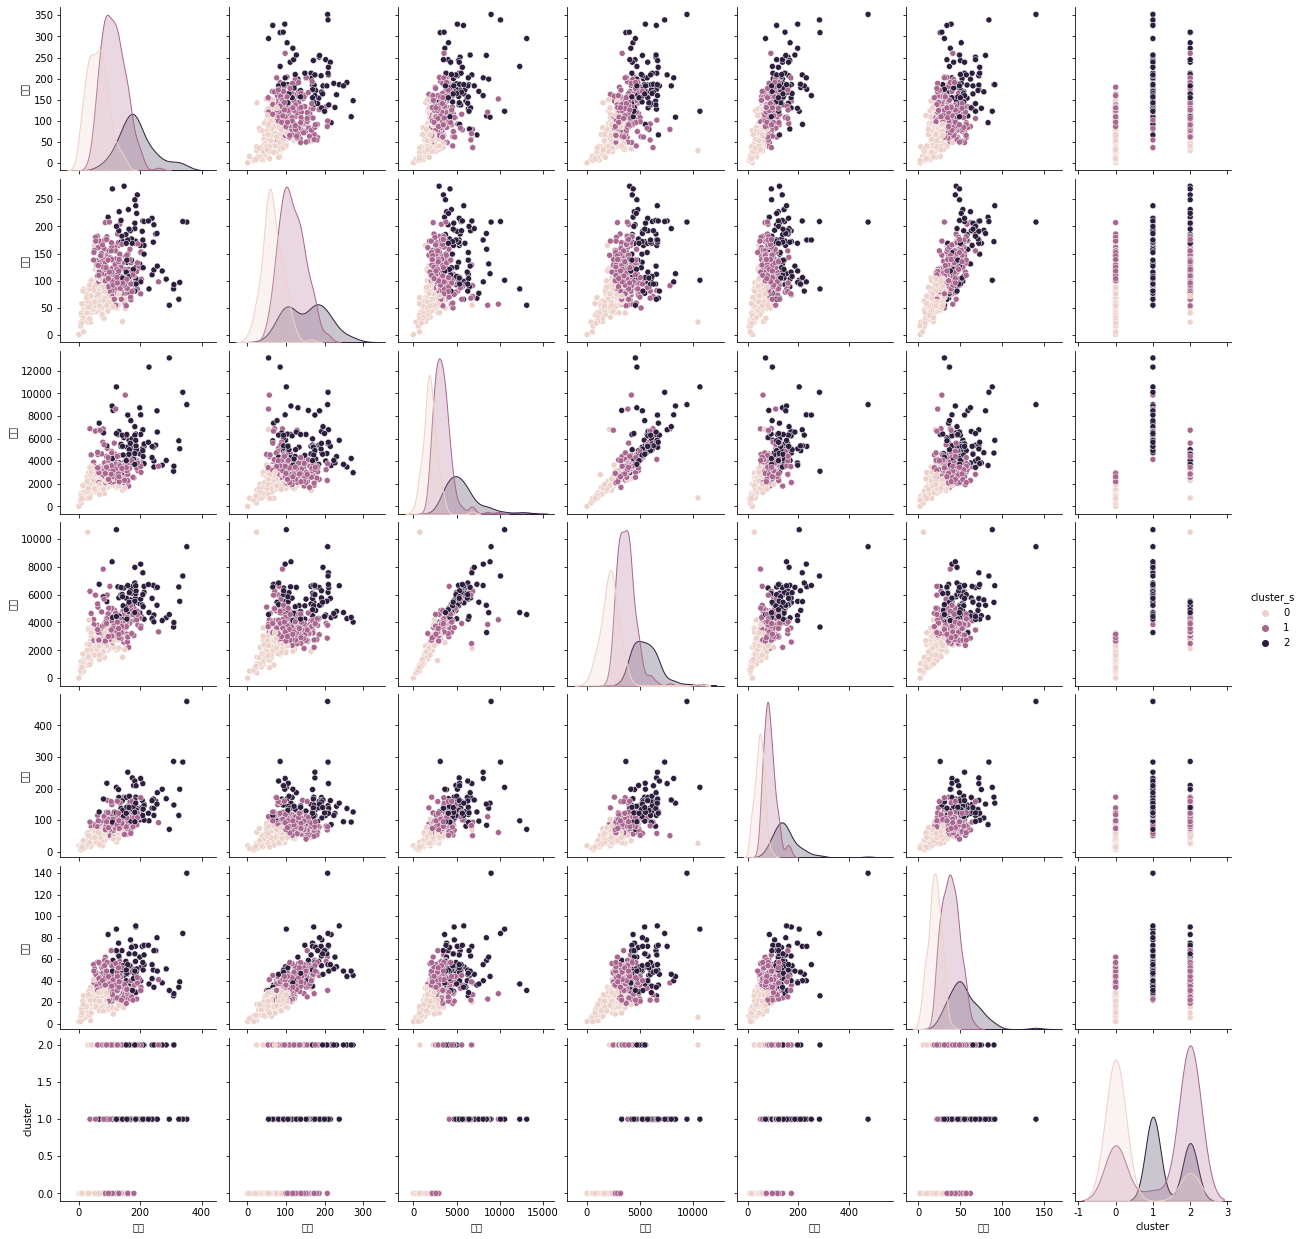

In [30]:
sns.pairplot(df_kmean, hue="cluster_s")

In [31]:
scaled_df['cluster_s'] = pred_s 
scaled_df

,출생,사망,전입,전출,혼인,이혼,cluster_s
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,1
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,1
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,1
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,1
...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,1
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,2
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,1
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,1


C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MEDICI\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing 

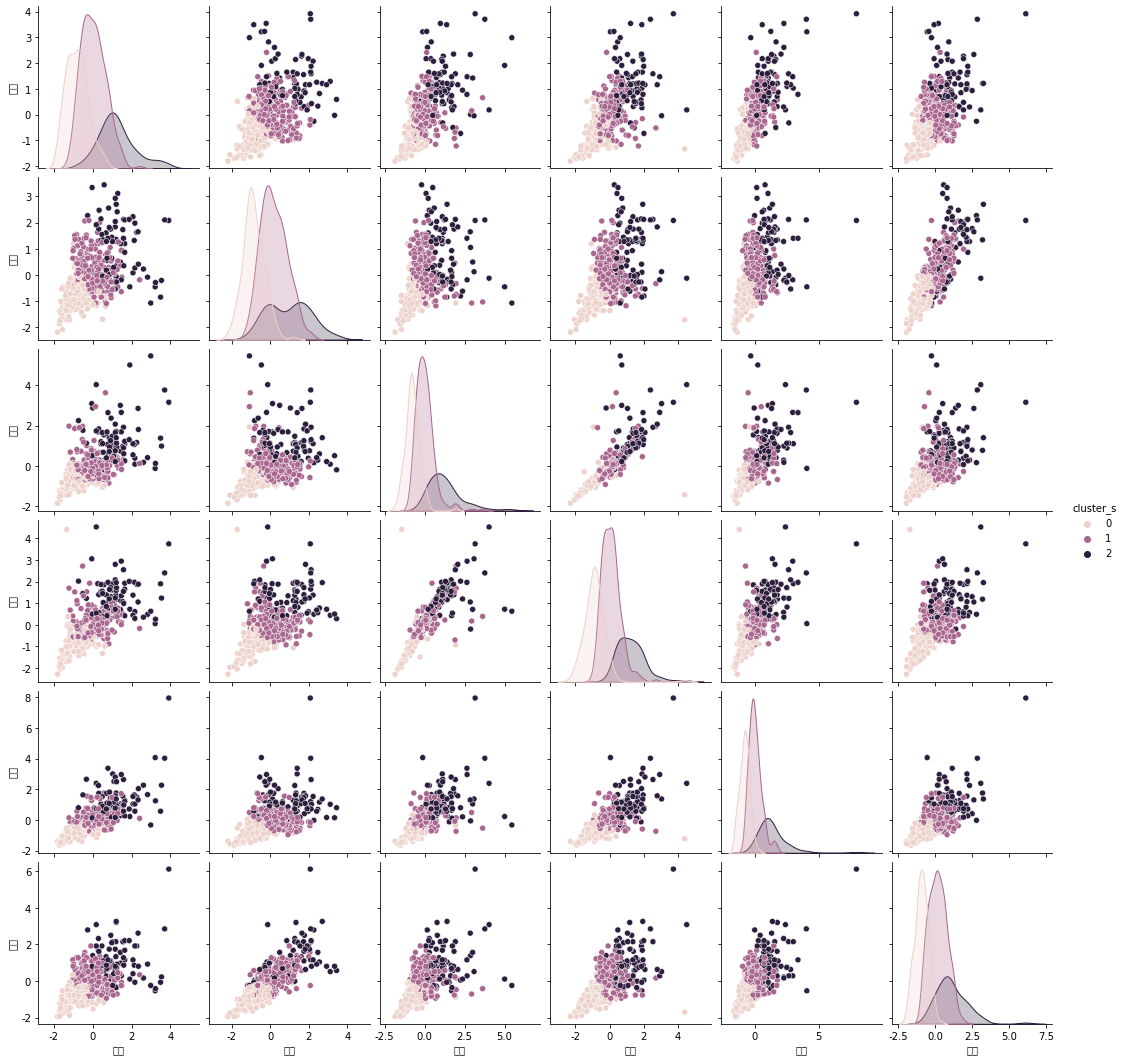

In [32]:
sns.pairplot(scaled_df, hue="cluster_s")

In [33]:
a = pd.read_excel(r'전체동.xlsx')

In [34]:
data = df_kmean.copy()
data["위도"] = df["위도"]
data["경도"] = df["경도"]
data["동"] = a["동"]
data

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,위도,경도,동
0,17,29,829,937,12,13,0,0,37.481054,127.053708,개포1동
1,152,57,9853,4191,61,28,1,1,37.489774,127.069120,개포2동
2,91,57,4408,3308,91,41,2,1,37.478999,127.051657,개포4동
3,93,81,5141,5967,112,45,1,1,37.511555,127.028446,논현1동
4,102,76,4171,4824,87,40,2,1,37.517375,127.037196,논현2동
...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,37.589362,127.074210,상봉2동
421,183,249,3719,4709,95,49,2,2,37.605930,127.099529,신내1동
422,132,139,2182,2903,74,39,0,1,37.606256,127.094209,신내2동
423,131,118,2619,3157,98,34,0,1,37.601147,127.080641,중화1동


In [35]:
data.to_csv("kmeans_6columns_scal.csv", encoding="utf-8-sig")

## 지하철 컬럼 추가해서 해석해보기

In [36]:
sub = pd.read_csv("서울시 동별 지하철 수 .csv",encoding="utf-8")
sub

,구시군,동,지하철 수,역이름
0,종로구,청운효자동,0,NaN
1,종로구,사직동,0,NaN
2,종로구,삼청동,0,NaN
3,종로구,부암동,0,NaN
4,종로구,평창동,0,NaN
...,...,...,...,...
420,강동구,성내3동,1,둔총동역
421,강동구,길동,1,길동역
422,강동구,둔촌1동,2,"둔촌동역,둔촌오륜역"
423,강동구,둔촌2동,0,NaN


In [37]:
scaled_df["동"] = a["동"]
scaled_df["자치구"] = a["자치구"]
d = pd.merge(scaled_df,sub, left_on = ["동","자치구"],right_on = ["동","구시군"], how = "outer")

In [38]:
d

,출생,사망,전입,전출,혼인,이혼,cluster_s,동,자치구,구시군,지하철 수,역이름
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0,개포1동,강남구,강남구,0,NaN
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,1,개포2동,강남구,강남구,3,"구룡역,개포동역,대모산입구역"
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,1,개포4동,강남구,강남구,0,NaN
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,1,논현1동,강남구,강남구,4,"신사역,논현역,신논현역,언주역"
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,1,논현2동,강남구,강남구,4,"학동역,강남구청역,언주역,선정릉역"
...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,1,상봉2동,중랑구,중랑구,0,NaN
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,2,신내1동,중랑구,중랑구,2,"봉화산역,신내역"
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,1,신내2동,중랑구,중랑구,1,봉화산역
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,1,중화1동,중랑구,중랑구,1,중화역


In [39]:
d = a.fillna("PASS")

In [40]:
d[d["출생"]=="PASS"]

,Unnamed: 0,동,자치구,출생,사망,전입,전출,혼인,이혼,cluster,주민센터 이름,주민센터 주소,위도,경도


In [41]:
sub_df = pd.merge(scaled_df,sub, left_on = ["동","자치구"],right_on = ["동","구시군"], how = "outer").drop(["동","자치구","구시군","역이름","cluster_s"],axis=1)
sub_df

,출생,사망,전입,전출,혼인,이혼,지하철 수
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,3
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,0
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,4
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,4
...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,0
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,2
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,1
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,1


In [42]:
kmeans.fit(sub_df) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(sub_df)

In [43]:
df_kmean['cluster_sub'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub
0,17,29,829,937,12,13,0,0,0
1,152,57,9853,4191,61,28,1,1,1
2,91,57,4408,3308,91,41,2,1,2
3,93,81,5141,5967,112,45,1,1,1
4,102,76,4171,4824,87,40,2,1,1
...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2
421,183,249,3719,4709,95,49,2,2,1
422,132,139,2182,2903,74,39,0,1,2
423,131,118,2619,3157,98,34,0,1,2


In [44]:
df_kmean['cluster_sub'].value_counts()

2    192
0    140
1     93
Name: cluster_sub, dtype: int64

In [45]:
df_kmean.describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,111.635294,107.110588,3336.910588,3586.894118,87.087059,35.216471,1.072941,0.872941,1.122353
std,61.458846,48.499023,1800.702209,1561.527677,49.019196,17.134738,0.924941,0.718914,0.876364
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.000000,0.000000
25%,68.000000,71.000000,2158.000000,2549.000000,56.000000,23.000000,0.000000,0.000000,0.000000
50%,102.000000,100.000000,2965.000000,3389.000000,78.000000,33.000000,1.000000,1.000000,1.000000
75%,148.000000,136.000000,4021.000000,4334.000000,108.000000,46.000000,2.000000,1.000000,2.000000
max,352.000000,274.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.000000,2.000000


In [46]:
df_kmean[df_kmean["cluster_sub"] == 2].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.0
mean,113.765625,120.520833,3214.718750,3614.744792,86.619792,38.447917,1.437500,1.026042,2.0
std,39.236326,36.066976,941.552508,778.145683,24.815892,10.804178,0.883976,0.189651,0.0
min,37.000000,50.000000,1396.000000,1933.000000,40.000000,19.000000,0.000000,0.000000,2.0
25%,84.000000,95.000000,2621.250000,3026.500000,69.000000,30.000000,0.000000,1.000000,2.0
50%,110.000000,116.000000,3111.500000,3595.500000,82.000000,37.500000,2.000000,1.000000,2.0
75%,139.500000,140.500000,3642.750000,4055.750000,98.000000,46.000000,2.000000,1.000000,2.0
max,260.000000,274.000000,8616.000000,6589.000000,173.000000,73.000000,2.000000,2.000000,2.0


In [47]:
df_kmean[df_kmean["cluster_sub"] == 0].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0
mean,61.728571,64.500000,1963.071429,2238.814286,47.564286,19.364286,0.342857,0.007143,0.0
std,34.139334,25.005179,856.762810,1071.530470,19.124059,7.596109,0.756473,0.084515,0.0
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.000000,0.0
25%,36.000000,50.000000,1532.500000,1670.500000,35.000000,15.000000,0.000000,0.000000,0.0
50%,61.000000,63.000000,1882.500000,2205.500000,48.000000,20.000000,0.000000,0.000000,0.0
75%,83.250000,82.500000,2383.250000,2667.750000,62.000000,24.250000,0.000000,0.000000,0.0
max,152.000000,127.000000,6807.000000,10467.000000,103.000000,41.000000,2.000000,1.000000,0.0


In [48]:
df_kmean[df_kmean["cluster_sub"] == 1].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0
mean,182.365591,143.569892,5657.322581,5558.763441,147.548387,52.408602,1.419355,1.860215,1.0
std,59.950847,52.086967,1910.002647,1244.276011,56.305169,17.905693,0.496128,0.348643,0.0
min,67.000000,55.000000,3109.000000,3277.000000,51.000000,26.000000,1.000000,1.000000,1.0
25%,145.000000,97.000000,4321.000000,4658.000000,117.000000,40.000000,1.000000,2.000000,1.0
50%,179.000000,134.000000,5306.000000,5404.000000,138.000000,50.000000,1.000000,2.000000,1.0
75%,207.000000,187.000000,6364.000000,6269.000000,164.000000,62.000000,2.000000,2.000000,1.0
max,352.000000,258.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.000000,1.0


In [49]:
data1 = df_kmean.copy()
data1["위도"] = a["위도"]
data1["경도"] = a["경도"]
data1["동"] = a["동"]
data1

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,위도,경도,동
0,17,29,829,937,12,13,0,0,0,37.481054,127.053708,개포1동
1,152,57,9853,4191,61,28,1,1,1,37.489774,127.069120,개포2동
2,91,57,4408,3308,91,41,2,1,2,37.478999,127.051657,개포4동
3,93,81,5141,5967,112,45,1,1,1,37.511555,127.028446,논현1동
4,102,76,4171,4824,87,40,2,1,1,37.517375,127.037196,논현2동
...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,37.589362,127.074210,상봉2동
421,183,249,3719,4709,95,49,2,2,1,37.605930,127.099529,신내1동
422,132,139,2182,2903,74,39,0,1,2,37.606256,127.094209,신내2동
423,131,118,2619,3157,98,34,0,1,2,37.601147,127.080641,중화1동


In [50]:
data1.to_csv("kmeans_6columns_sub.csv", encoding="utf-8-sig")

## 대학수까지 더해서 

In [51]:
uni = pd.read_csv("서울 동별 대학 수.csv",encoding="utf-8")
uni

,구시군,동,대학 수
0,종로구,청운효자동,1
1,종로구,사직동,0
2,종로구,삼청동,0
3,종로구,부암동,1
4,종로구,평창동,0
...,...,...,...
420,강동구,성내3동,0
421,강동구,길동,0
422,강동구,둔촌1동,0
423,강동구,둔촌2동,0


In [52]:
sub_df["동"] = a["동"]
sub_df["자치구"] = a["자치구"]

In [53]:
uni_df = pd.merge(sub_df,uni, left_on = ["동","자치구"],right_on = ["동","구시군"], how = "outer").drop(["동","자치구","구시군"],axis=1)
uni_df

,출생,사망,전입,전출,혼인,이혼,지하철 수,대학 수
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0,0
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,3,0
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,0,0
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,4,0
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,4,1
...,...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,0,0
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,2,0
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,1,0
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,1,0


#### 지하철 대학수 같이 낀 것

In [54]:
kmeans.fit(uni_df) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(uni_df)

In [55]:
df_kmean['cluster_uni'] = pred_s 
df_kmean['대학 수 '] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수
0,17,29,829,937,12,13,0,0,0,0,0
1,152,57,9853,4191,61,28,1,1,1,2,2
2,91,57,4408,3308,91,41,2,1,2,1,1
3,93,81,5141,5967,112,45,1,1,1,2,2
4,102,76,4171,4824,87,40,2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,1,1
421,183,249,3719,4709,95,49,2,2,1,2,2
422,132,139,2182,2903,74,39,0,1,2,1,1
423,131,118,2619,3157,98,34,0,1,2,1,1


In [56]:
df_kmean['cluster_uni'].value_counts()

1    192
0    140
2     93
Name: cluster_uni, dtype: int64

#### 대학수만 낀 것

In [57]:
un = uni_df.drop("지하철 수 ", axis=1)

In [58]:
kmeans.fit(un) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(un)

In [59]:
un['cluster_uni'] = pred_s 
un

,출생,사망,전입,전출,혼인,이혼,대학 수,cluster_uni
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,0,0
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,0,2
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,0,2
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,0,2
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,1,2
...,...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,0,2
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,0,1
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,0,2
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,0,2


In [60]:
un['cluster_uni'].value_counts()

2    199
0    140
1     86
Name: cluster_uni, dtype: int64

In [61]:
df_kmean['cluster_uni'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수
0,17,29,829,937,12,13,0,0,0,0,0
1,152,57,9853,4191,61,28,1,1,1,2,2
2,91,57,4408,3308,91,41,2,1,2,2,1
3,93,81,5141,5967,112,45,1,1,1,2,2
4,102,76,4171,4824,87,40,2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1
421,183,249,3719,4709,95,49,2,2,1,1,2
422,132,139,2182,2903,74,39,0,1,2,2,1
423,131,118,2619,3157,98,34,0,1,2,2,1


In [62]:
data2 = df_kmean.copy()
data2["위도"] = a["위도"]
data2["경도"] = a["경도"]
data2["동"] = a["동"]
data2

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,위도,경도,동
0,17,29,829,937,12,13,0,0,0,0,0,37.481054,127.053708,개포1동
1,152,57,9853,4191,61,28,1,1,1,2,2,37.489774,127.069120,개포2동
2,91,57,4408,3308,91,41,2,1,2,2,1,37.478999,127.051657,개포4동
3,93,81,5141,5967,112,45,1,1,1,2,2,37.511555,127.028446,논현1동
4,102,76,4171,4824,87,40,2,1,1,2,2,37.517375,127.037196,논현2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1,37.589362,127.074210,상봉2동
421,183,249,3719,4709,95,49,2,2,1,1,2,37.605930,127.099529,신내1동
422,132,139,2182,2903,74,39,0,1,2,2,1,37.606256,127.094209,신내2동
423,131,118,2619,3157,98,34,0,1,2,2,1,37.601147,127.080641,중화1동


In [63]:
data2.to_csv("kmeans_6columns_uni.csv", encoding="utf-8-sig")

In [64]:
data2[data2["cluster_sub"] != data2["cluster_uni"]]

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,위도,경도,동
1,152,57,9853,4191,61,28,1,1,1,2,2,37.489774,127.069120,개포2동
3,93,81,5141,5967,112,45,1,1,1,2,2,37.511555,127.028446,논현1동
4,102,76,4171,4824,87,40,2,1,1,2,2,37.517375,127.037196,논현2동
6,80,91,6859,7825,51,38,1,1,1,2,2,37.502307,127.064213,대치2동
29,204,103,3917,4453,130,31,2,1,1,2,2,37.549759,127.145999,명일1동
44,51,165,1396,1933,45,33,0,0,2,0,1,37.625137,127.044834,번3동
61,170,133,3795,4734,92,54,2,1,1,2,2,37.553147,126.833307,발산1동
74,41,59,4559,4649,80,19,2,1,0,2,0,37.476275,126.958408,낙성대동
117,121,96,4411,4658,122,44,2,1,1,2,2,37.487401,126.890400,구로3동
142,172,138,3917,4781,145,51,2,2,2,1,1,37.654856,127.067016,상계6.7동


In [65]:
df_kmean["동"] = a["동"]
df_kmean["자치구"] = a["자치구"]
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,동,자치구
0,17,29,829,937,12,13,0,0,0,0,0,개포1동,강남구
1,152,57,9853,4191,61,28,1,1,1,2,2,개포2동,강남구
2,91,57,4408,3308,91,41,2,1,2,2,1,개포4동,강남구
3,93,81,5141,5967,112,45,1,1,1,2,2,논현1동,강남구
4,102,76,4171,4824,87,40,2,1,1,2,2,논현2동,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1,상봉2동,중랑구
421,183,249,3719,4709,95,49,2,2,1,1,2,신내1동,중랑구
422,132,139,2182,2903,74,39,0,1,2,2,1,신내2동,중랑구
423,131,118,2619,3157,98,34,0,1,2,2,1,중화1동,중랑구


In [66]:
df_kmean = pd.merge(df_kmean,sub, left_on = ["동","자치구"],right_on = ["동","구시군"], how = "outer").drop(["자치구","역이름"],axis=1)

In [67]:
df_kmean = pd.merge(df_kmean,uni, on = ["동","구시군"], how = "outer")

In [68]:
df_kmean[df_kmean["cluster_uni"]==0].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,지하철 수,대학 수
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.000000,140.0,140.000000,140.000000,140.000000
mean,61.800000,65.257143,1940.478571,2219.414286,47.314286,19.464286,0.328571,0.0,0.014286,0.0,0.007143,0.892857,0.150000
std,34.106098,26.403175,829.072347,1051.988579,18.924722,7.682935,0.743730,0.0,0.169031,0.0,0.084515,0.862458,0.447616
min,1.000000,1.000000,1.000000,11.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,36.000000,50.000000,1528.750000,1670.500000,35.000000,15.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,61.000000,63.000000,1868.000000,2204.500000,48.000000,20.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000
75%,83.250000,84.000000,2381.250000,2632.500000,61.250000,25.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000
max,152.000000,165.000000,6807.000000,10467.000000,103.000000,41.000000,2.000000,0.0,2.000000,0.0,1.000000,4.000000,2.000000


In [69]:
df_kmean[df_kmean["cluster_uni"]==1].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,지하철 수,대학 수
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.000000,86.0,86.000000,86.000000,86.000000
mean,188.186047,154.081395,5617.093023,5558.813953,151.500000,54.081395,1.406977,2.0,1.069767,1.0,1.930233,1.779070,0.116279
std,58.718173,52.698748,1941.667262,1267.345837,56.159385,18.173811,0.494152,0.0,0.256249,0.0,0.256249,1.044889,0.417798
min,67.000000,55.000000,2980.000000,3277.000000,71.000000,26.000000,1.000000,2.0,1.000000,1.0,1.000000,0.000000,0.000000
25%,154.250000,105.250000,4261.000000,4587.000000,119.500000,42.000000,1.000000,2.0,1.000000,1.0,2.000000,1.000000,0.000000
50%,183.000000,165.000000,5308.000000,5444.000000,139.500000,51.000000,1.000000,2.0,1.000000,1.0,2.000000,2.000000,0.000000
75%,212.250000,192.750000,6364.000000,6270.500000,167.000000,64.750000,2.000000,2.0,1.000000,1.0,2.000000,2.000000,0.000000
max,352.000000,274.000000,13142.000000,10648.000000,476.000000,140.000000,2.000000,2.0,2.000000,1.0,2.000000,6.000000,3.000000


In [70]:
df_kmean[df_kmean["cluster_uni"]==2].describe()

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,지하철 수,대학 수
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0,199.000000,199.0,199.000000,199.000000,199.000000
mean,113.613065,116.256281,3333.919598,3696.753769,87.231156,38.145729,1.452261,1.0,1.924623,2.0,1.060302,1.085427,0.155779
std,38.555824,32.778098,1097.963976,855.480239,24.891417,10.336455,0.868345,0.0,0.283105,0.0,0.258945,0.988693,0.415428
min,37.000000,50.000000,1678.000000,2137.000000,40.000000,19.000000,0.000000,1.0,0.000000,2.0,0.000000,0.000000,0.000000
25%,84.500000,92.500000,2628.000000,3070.000000,69.500000,30.000000,0.500000,1.0,2.000000,2.0,1.000000,0.000000,0.000000
50%,109.000000,112.000000,3176.000000,3623.000000,82.000000,38.000000,2.000000,1.0,2.000000,2.0,1.000000,1.000000,0.000000
75%,139.000000,139.000000,3772.500000,4142.500000,99.000000,45.500000,2.000000,1.0,2.000000,2.0,1.000000,2.000000,0.000000
max,260.000000,208.000000,9853.000000,7825.000000,173.000000,68.000000,2.000000,1.0,2.000000,2.0,2.000000,5.000000,2.000000


## 인구 비율로 보기

In [71]:
pop = pd.read_csv('서울시 주민등록인구(연령별_동별) 통계.csv',thousands=',')
pop.drop("기간",axis=1, inplace=True)

In [72]:
pop

,자치구,동,구분,계,0~19세,20~39세,40~59세,60~79세,80세 이상
0,종로구,사직동,계,9630,1250,2731,3133,1950,566
1,종로구,사직동,한국인,9370,1233,2642,3007,1925,563
2,종로구,사직동,외국인,260,17,89,126,25,3
3,종로구,삼청동,계,2741,345,678,833,703,182
4,종로구,삼청동,한국인,2441,265,622,724,650,180
...,...,...,...,...,...,...,...,...,...
1270,강동구,강일동,한국인,32762,6576,8111,10112,6880,1083
1271,강동구,강일동,외국인,185,4,107,58,15,1
1272,강동구,상일동,계,49086,11184,12387,16030,8497,988
1273,강동구,상일동,한국인,48932,11171,12333,15955,8486,987


In [73]:
pop_t = pop.iloc[0::3]
pop_k = pop.iloc[1::3]
pop_f = pop.iloc[2::3]

In [74]:
rate = pd.merge(df_kmean,pop_t.loc[:,["계","동","자치구"]], left_on=["동","구시군"],right_on=["동","자치구"] ,how="outer")

In [75]:
rate = pd.merge(rate,pop_k.loc[:,["계","동","자치구"]], left_on=["동","구시군"],right_on=["동","자치구"] )

In [76]:
rate = pd.merge(rate,pop_f.loc[:,["계","동","자치구"]], left_on=["동","구시군"],right_on=["동","자치구"] )

In [77]:
rate.drop(["자치구_x","자치구_y","자치구"],axis=1, inplace=True)

In [78]:
rate

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,동,구시군,지하철 수,대학 수,계_x,계_y,계
0,17,29,829,937,12,13,0,0,0,0,0,개포1동,강남구,0,0,6982,6962,20
1,152,57,9853,4191,61,28,1,1,1,2,2,개포2동,강남구,3,0,28240,28164,76
2,91,57,4408,3308,91,41,2,1,2,2,1,개포4동,강남구,0,0,23790,23641,149
3,93,81,5141,5967,112,45,1,1,1,2,2,논현1동,강남구,4,0,22583,21973,610
4,102,76,4171,4824,87,40,2,1,1,2,2,논현2동,강남구,4,1,21300,20971,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1,상봉2동,중랑구,0,0,20558,20250,308
421,183,249,3719,4709,95,49,2,2,1,1,2,신내1동,중랑구,2,0,38522,38381,141
422,132,139,2182,2903,74,39,0,1,2,2,1,신내2동,중랑구,1,0,20311,20222,89
423,131,118,2619,3157,98,34,0,1,2,2,1,중화1동,중랑구,1,0,19669,19495,174


In [79]:
rate["출생비_t"] = rate["출생"] / rate["계_x"]
rate["출생비_k"] = rate["출생"] / rate["계_y"]
rate["사망비_t"] = rate["사망"] / rate["계_x"]
rate["사망비_k"] = rate["사망"] / rate["계_y"]
rate["혼인비_t"] = rate["혼인"] / rate["계_x"]
rate["혼인비_k"] = rate["혼인"] / rate["계_y"]
rate["이혼비_t"] = rate["이혼"] / rate["계_x"]
rate["이혼비_k"] = rate["이혼"] / rate["계_y"]

In [80]:
rate.drop(["출생","사망","혼인","이혼","cluster","cluster_s","cluster_sub","cluster_uni"],axis=1,inplace=True)

#### 한국인의 수로만 비율

In [81]:
in_col = ['출생비_k', '사망비_k', '혼인비_k', '이혼비_k','지하철 수 ','대학 수']
rate_k = rate[in_col]
rate_k["전입_s"] = sub_df["전입"]
rate_k["전출_s"] = sub_df["전출"]
rate_k

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_16912/656282874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_k["전입_s"] = sub_df["전입"]
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_16912/656282874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_k["전출_s"] = sub_df["전출"]


,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s
0,0.002442,0.004165,0.001724,0.001867,0,0,-1.394382,-1.698988
1,0.005397,0.002024,0.002166,0.000994,3,0,3.622903,0.387324
2,0.003849,0.002411,0.003849,0.001734,0,0,0.595519,-0.178814
3,0.004232,0.003686,0.005097,0.002048,4,0,1.003062,1.526013
4,0.004864,0.003624,0.004149,0.001907,4,1,0.463748,0.793174
...,...,...,...,...,...,...,...,...
420,0.006222,0.004741,0.007901,0.002173,0,0,0.611642,0.283458
421,0.004768,0.006488,0.002475,0.001277,2,0,0.212439,0.719442
422,0.006528,0.006874,0.003659,0.001929,1,0,-0.642123,-0.438481
423,0.006720,0.006053,0.005027,0.001744,1,0,-0.399154,-0.275628


In [230]:
kmeans.fit(rate_k) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(rate_k)

In [231]:
df_kmean['cluster_rate_k'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t,cluster_h_r,cluster_h,cluster_rate_k_s
0,17,29,829,937,12,13,0,0,0,0,0,개포1동,강남구,0,0,1,1,1,0,0
1,152,57,9853,4191,61,28,1,1,1,2,2,개포2동,강남구,3,0,0,0,0,2,0
2,91,57,4408,3308,91,41,2,1,2,2,1,개포4동,강남구,0,0,2,2,1,1,0
3,93,81,5141,5967,112,45,1,1,1,2,2,논현1동,강남구,4,0,0,0,1,1,0
4,102,76,4171,4824,87,40,2,1,1,2,2,논현2동,강남구,4,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1,상봉2동,중랑구,0,0,2,2,1,1,0
421,183,249,3719,4709,95,49,2,2,1,1,2,신내1동,중랑구,2,0,2,2,2,2,0
422,132,139,2182,2903,74,39,0,1,2,2,1,신내2동,중랑구,1,0,1,1,2,2,0
423,131,118,2619,3157,98,34,0,1,2,2,1,중화1동,중랑구,1,0,2,2,1,0,0


In [233]:
df_kmean["cluster_rate_k"].value_counts()

2    180
1    152
0     93
Name: cluster_rate_k, dtype: int64

#### 한국인 + 외국인 전체 인구수 비율

In [85]:
in_col = ['출생비_t', '사망비_t', '혼인비_t', '이혼비_t','지하철 수 ','대학 수']
rate_t = rate[in_col]
rate_t["전입_s"] = sub_df["전입"]
rate_t["전출_s"] = sub_df["전출"]
rate_t

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_16912/1201756872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_t["전입_s"] = sub_df["전입"]
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_16912/1201756872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_t["전출_s"] = sub_df["전출"]


,출생비_t,사망비_t,혼인비_t,이혼비_t,지하철 수,대학 수,전입_s,전출_s
0,0.002435,0.004154,0.001719,0.001862,0,0,-1.394382,-1.698988
1,0.005382,0.002018,0.002160,0.000992,3,0,3.622903,0.387324
2,0.003825,0.002396,0.003825,0.001723,0,0,0.595519,-0.178814
3,0.004118,0.003587,0.004959,0.001993,4,0,1.003062,1.526013
4,0.004789,0.003568,0.004085,0.001878,4,1,0.463748,0.793174
...,...,...,...,...,...,...,...,...
420,0.006129,0.004670,0.007783,0.002140,0,0,0.611642,0.283458
421,0.004751,0.006464,0.002466,0.001272,2,0,0.212439,0.719442
422,0.006499,0.006844,0.003643,0.001920,1,0,-0.642123,-0.438481
423,0.006660,0.005999,0.004982,0.001729,1,0,-0.399154,-0.275628


In [86]:
kmeans.fit(rate_t) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(rate_t)

In [87]:
df_kmean['cluster_rate_t'] = pred_s 
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t
0,17,29,829,937,12,13,0,0,0,0,0,개포1동,강남구,0,0,1,1
1,152,57,9853,4191,61,28,1,1,1,2,2,개포2동,강남구,3,0,0,0
2,91,57,4408,3308,91,41,2,1,2,2,1,개포4동,강남구,0,0,2,2
3,93,81,5141,5967,112,45,1,1,1,2,2,논현1동,강남구,4,0,0,0
4,102,76,4171,4824,87,40,2,1,1,2,2,논현2동,강남구,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1,상봉2동,중랑구,0,0,2,2
421,183,249,3719,4709,95,49,2,2,1,1,2,신내1동,중랑구,2,0,2,2
422,132,139,2182,2903,74,39,0,1,2,2,1,신내2동,중랑구,1,0,1,1
423,131,118,2619,3157,98,34,0,1,2,2,1,중화1동,중랑구,1,0,2,2


In [88]:
df_kmean["cluster_rate_t"].value_counts()

2    180
1    152
0     93
Name: cluster_rate_t, dtype: int64

In [89]:
data3 = df_kmean.copy()
data3["위도"] = a["위도"]
data3["경도"] = a["경도"]
data3

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t,위도,경도
0,17,29,829,937,12,13,0,0,0,0,0,개포1동,강남구,0,0,1,1,37.481054,127.053708
1,152,57,9853,4191,61,28,1,1,1,2,2,개포2동,강남구,3,0,0,0,37.489774,127.069120
2,91,57,4408,3308,91,41,2,1,2,2,1,개포4동,강남구,0,0,2,2,37.478999,127.051657
3,93,81,5141,5967,112,45,1,1,1,2,2,논현1동,강남구,4,0,0,0,37.511555,127.028446
4,102,76,4171,4824,87,40,2,1,1,2,2,논현2동,강남구,4,1,0,0,37.517375,127.037196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1,상봉2동,중랑구,0,0,2,2,37.589362,127.074210
421,183,249,3719,4709,95,49,2,2,1,1,2,신내1동,중랑구,2,0,2,2,37.605930,127.099529
422,132,139,2182,2903,74,39,0,1,2,2,1,신내2동,중랑구,1,0,1,1,37.606256,127.094209
423,131,118,2619,3157,98,34,0,1,2,2,1,중화1동,중랑구,1,0,2,2,37.601147,127.080641


In [90]:
data3.to_csv("kmeans_8columns_rate.csv", encoding="utf-8-sig")

In [91]:
data3["cluster_rate_k"].replace({0:2,1:0,2:1}, inplace=True)

In [92]:
data3["cluster_rate_k"].value_counts()

1    180
0    152
2     93
Name: cluster_rate_k, dtype: int64

In [93]:
data3["cluster_s"].value_counts()

1    199
0    140
2     86
Name: cluster_s, dtype: int64

In [94]:
data3["cluster_sub"].value_counts()

2    192
0    140
1     93
Name: cluster_sub, dtype: int64

In [95]:
data3[data3["cluster_rate_k"] != data3["cluster_s"]]

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t,위도,경도
1,152,57,9853,4191,61,28,1,1,1,2,2,개포2동,강남구,3,0,2,0,37.489774,127.069120
3,93,81,5141,5967,112,45,1,1,1,2,2,논현1동,강남구,4,0,2,0,37.511555,127.028446
4,102,76,4171,4824,87,40,2,1,1,2,2,논현2동,강남구,4,1,2,0,37.517375,127.037196
5,33,41,2965,3610,27,16,2,0,0,0,0,대치1동,강남구,2,0,1,2,37.493291,127.056803
6,80,91,6859,7825,51,38,1,1,1,2,2,대치2동,강남구,3,0,2,0,37.502307,127.064213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,90,101,2272,2549,65,27,0,0,0,0,0,약수동,중구,2,0,1,2,37.552466,127.009006
409,66,110,2105,2733,60,57,0,1,2,2,1,망우3동,중랑구,0,0,0,1,37.605688,127.100864
411,106,155,2834,3459,159,68,2,1,2,2,1,면목2동,중랑구,0,0,0,1,37.589764,127.079042
421,183,249,3719,4709,95,49,2,2,1,1,2,신내1동,중랑구,2,0,1,2,37.605930,127.099529


In [96]:
rate_k["동"] = a["동"]

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_16912/1796451834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_k["동"] = a["동"]


In [97]:
rate_k[rate_k["동"] == data3[data3["cluster_rate_k"] != data3["cluster_s"]]["동"]]

ValueError: Can only compare identically-labeled Series objects

In [98]:
data3[data3["cluster_rate_k"] != data3["cluster_s"]]["동"]

1      개포2동
3      논현1동
4      논현2동
5      대치1동
6      대치2동
       ... 
401     약수동
409    망우3동
411    면목2동
421    신내1동
422    신내2동
Name: 동, Length: 124, dtype: object

In [99]:
rate_k["cluster_rate"] = df_kmean['cluster_rate_k']

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_16912/3093849200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_k["cluster_rate"] = df_kmean['cluster_rate_k']


In [100]:
rate_k.describe()

,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s,cluster_rate
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,4.250000e+02,4.250000e+02,425.000000
mean,0.005006,0.005070,0.004354,0.001658,1.162353,0.145882,-1.202633e-16,6.210718e-17,1.204706
std,0.002646,0.002248,0.007162,0.000908,1.011488,0.426026,1.001179e+00,1.001179e+00,0.775799
min,0.001201,0.001296,0.001051,0.000365,0.000000,0.000000,-1.854744e+00,-2.292696e+00,0.000000
25%,0.003650,0.003842,0.003029,0.001236,0.000000,0.000000,-6.554665e-01,-6.654492e-01,1.000000
50%,0.004774,0.004769,0.003729,0.001581,1.000000,0.000000,-2.067798e-01,-1.268805e-01,1.000000
75%,0.005775,0.005900,0.004591,0.001935,2.000000,0.000000,3.803492e-01,4.790094e-01,2.000000
max,0.044776,0.035821,0.143939,0.015152,6.000000,3.000000,5.451565e+00,4.527251e+00,2.000000


In [101]:
rate_k[rate_k["cluster_rate"]==0].describe()

,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s,cluster_rate
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0
mean,0.005547,0.004356,0.004690,0.001592,2.150538,0.139785,1.361020,1.370178,0.0
std,0.004362,0.003518,0.004086,0.000886,1.122364,0.456627,1.079291,0.837051,0.0
min,0.001562,0.001296,0.001389,0.000659,0.000000,0.000000,-1.437749,-0.198690,0.0
25%,0.004402,0.003206,0.003251,0.001171,1.000000,0.000000,0.673914,0.793174,0.0
50%,0.004995,0.003806,0.004188,0.001494,2.000000,0.000000,1.123712,1.242623,0.0
75%,0.005832,0.004932,0.004974,0.001869,3.000000,0.000000,1.731969,1.848513,0.0
max,0.044776,0.035821,0.040299,0.008955,6.000000,3.000000,5.451565,4.527251,0.0


In [102]:
rate_k[rate_k["cluster_rate"]==1].describe()

,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s,cluster_rate
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.0
mean,0.004704,0.005629,0.004642,0.001775,0.526316,0.085526,-0.809703,-0.880560,1.0
std,0.002005,0.001893,0.011453,0.001236,0.597427,0.344187,0.333429,0.474846,0.0
min,0.001201,0.001521,0.001051,0.000365,0.000000,0.000000,-1.854744,-2.292696,1.0
25%,0.003238,0.004363,0.002719,0.001249,0.000000,0.000000,-0.977248,-1.159939,1.0
50%,0.004378,0.005302,0.003651,0.001631,0.000000,0.000000,-0.777229,-0.812273,1.0
75%,0.005671,0.006791,0.004483,0.002028,1.000000,0.000000,-0.573179,-0.546515,1.0
max,0.010950,0.012453,0.143939,0.015152,2.000000,2.000000,-0.144509,0.043025,1.0


In [103]:
rate_k[rate_k["cluster_rate"]==2].describe()

,출생비_k,사망비_k,혼인비_k,이혼비_k,지하철 수,대학 수,전입_s,전출_s,cluster_rate
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0
mean,0.004982,0.004968,0.003938,0.001595,1.188889,0.200000,-0.019444,0.035659,2.0
std,0.001784,0.001429,0.001407,0.000492,0.789519,0.465575,0.402863,0.434592,0.0
min,0.001375,0.001708,0.001125,0.000423,0.000000,0.000000,-0.959039,-1.306602,2.0
25%,0.003752,0.004061,0.003130,0.001253,1.000000,0.000000,-0.266271,-0.246936,2.0
50%,0.004939,0.004822,0.003698,0.001590,1.000000,0.000000,-0.024692,0.065786,2.0
75%,0.005749,0.005814,0.004434,0.001912,2.000000,0.000000,0.189782,0.353504,2.0
max,0.013771,0.011211,0.012746,0.003507,4.000000,2.000000,1.929347,1.117598,2.0


In [104]:
rate_k.to_csv("컬럼6개_비율.csv", encoding="utf-8-sig")

## 주거형태 추가하기

In [132]:
house = pd.read_csv("서울시 동별 거주형태_원본.csv",skiprows = [1,3], header=1, thousands=',')
house

,기간,자치구,동,합계,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
0,2020,종로구,소계,46859,"12,259","6,572","4,070","1,617","15,688","5,460","12,540",912
1,2020,종로구,사직동,2778,650,467,108,75,"1,591",78,411,48
2,2020,종로구,삼청동,730,644,414,134,96,X,19,37,30
3,2020,종로구,부암동,3070,"1,033",750,214,69,121,903,976,37
4,2020,종로구,평창동,5958,"1,553","1,088",314,151,"1,009","2,186","1,139",71
...,...,...,...,...,...,...,...,...,...,...,...,...
445,2020,강동구,둔촌1동,5,5,X,X,X,X,X,X,X
446,2020,강동구,둔촌2동,7962,543,31,377,135,"5,011",154,"2,187",67
447,2020,강동구,암사1동,10089,"1,139",20,889,230,"2,790",247,"5,829",84
448,2020,강동구,천호2동,9362,"1,488",103,"1,134",251,"2,641",189,"4,901",143


In [133]:
house = house[house["동"] != "소계"]

In [134]:
house.drop(["기간","합계"],axis=1,inplace=True)
house

C:\Users\MEDICI\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,자치구,동,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
1,종로구,사직동,650,467,108,75,"1,591",78,411,48
2,종로구,삼청동,644,414,134,96,X,19,37,30
3,종로구,부암동,"1,033",750,214,69,121,903,976,37
4,종로구,평창동,"1,553","1,088",314,151,"1,009","2,186","1,139",71
5,종로구,무악동,48,14,9,25,"2,703",55,46,8
...,...,...,...,...,...,...,...,...,...,...
445,강동구,둔촌1동,5,X,X,X,X,X,X,X
446,강동구,둔촌2동,543,31,377,135,"5,011",154,"2,187",67
447,강동구,암사1동,"1,139",20,889,230,"2,790",247,"5,829",84
448,강동구,천호2동,"1,488",103,"1,134",251,"2,641",189,"4,901",143


In [135]:
house = house.apply(lambda x : x.str.replace(",","") )
house

,자치구,동,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
1,종로구,사직동,650,467,108,75,1591,78,411,48
2,종로구,삼청동,644,414,134,96,X,19,37,30
3,종로구,부암동,1033,750,214,69,121,903,976,37
4,종로구,평창동,1553,1088,314,151,1009,2186,1139,71
5,종로구,무악동,48,14,9,25,2703,55,46,8
...,...,...,...,...,...,...,...,...,...,...
445,강동구,둔촌1동,5,X,X,X,X,X,X,X
446,강동구,둔촌2동,543,31,377,135,5011,154,2187,67
447,강동구,암사1동,1139,20,889,230,2790,247,5829,84
448,강동구,천호2동,1488,103,1134,251,2641,189,4901,143


In [136]:
house.replace("X" , 0, inplace=True)
house

,자치구,동,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
1,종로구,사직동,650,467,108,75,1591,78,411,48
2,종로구,삼청동,644,414,134,96,0,19,37,30
3,종로구,부암동,1033,750,214,69,121,903,976,37
4,종로구,평창동,1553,1088,314,151,1009,2186,1139,71
5,종로구,무악동,48,14,9,25,2703,55,46,8
...,...,...,...,...,...,...,...,...,...,...
445,강동구,둔촌1동,5,0,0,0,0,0,0,0
446,강동구,둔촌2동,543,31,377,135,5011,154,2187,67
447,강동구,암사1동,1139,20,889,230,2790,247,5829,84
448,강동구,천호2동,1488,103,1134,251,2641,189,4901,143


In [303]:
house.to_csv("거주형태.csv", encoding="utf-8-sig")

### 인구 비율하고 결합하기

In [110]:
rate_t["동"] = rate["동"]
rate_t["구시군"] = rate["구시군"]
rate_t

C:\Users\MEDICI\AppData\Local\Temp/ipykernel_16912/3019758441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_t["동"] = rate["동"]
C:\Users\MEDICI\AppData\Local\Temp/ipykernel_16912/3019758441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_t["구시군"] = rate["구시군"]


,출생비_t,사망비_t,혼인비_t,이혼비_t,지하철 수,대학 수,전입_s,전출_s,동,구시군
0,0.002435,0.004154,0.001719,0.001862,0,0,-1.394382,-1.698988,개포1동,강남구
1,0.005382,0.002018,0.002160,0.000992,3,0,3.622903,0.387324,개포2동,강남구
2,0.003825,0.002396,0.003825,0.001723,0,0,0.595519,-0.178814,개포4동,강남구
3,0.004118,0.003587,0.004959,0.001993,4,0,1.003062,1.526013,논현1동,강남구
4,0.004789,0.003568,0.004085,0.001878,4,1,0.463748,0.793174,논현2동,강남구
...,...,...,...,...,...,...,...,...,...,...
420,0.006129,0.004670,0.007783,0.002140,0,0,0.611642,0.283458,상봉2동,중랑구
421,0.004751,0.006464,0.002466,0.001272,2,0,0.212439,0.719442,신내1동,중랑구
422,0.006499,0.006844,0.003643,0.001920,1,0,-0.642123,-0.438481,신내2동,중랑구
423,0.006660,0.005999,0.004982,0.001729,1,0,-0.399154,-0.275628,중화1동,중랑구


In [153]:
house_rate = pd.merge(rate_t,house,  left_on=["동","구시군"],right_on=["동","자치구"], how="outer").drop(["자치구","동","구시군"],axis=1)

In [203]:
house_rate

,출생비_t,사망비_t,혼인비_t,이혼비_t,지하철 수,대학 수,전입_s,전출_s,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
0,0.002435,0.004154,0.001719,0.001862,0,0,-1.394382,-1.698988,7,0,0,0,1499,0,102,0
1,0.005382,0.002018,0.002160,0.000992,3,0,3.622903,0.387324,62,6,40,16,6681,9,292,19
2,0.003825,0.002396,0.003825,0.001723,0,0,0.595519,-0.178814,258,5,174,79,3451,481,3031,188
3,0.004118,0.003587,0.004959,0.001993,4,0,1.003062,1.526013,854,64,620,170,1800,962,4278,219
4,0.004789,0.003568,0.004085,0.001878,4,1,0.463748,0.793174,616,60,413,143,2852,676,2812,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.006129,0.004670,0.007783,0.002140,0,0,0.611642,0.283458,906,76,633,197,2043,173,2891,133
421,0.004751,0.006464,0.002466,0.001272,2,0,0.212439,0.719442,436,73,262,101,11411,297,747,68
422,0.006499,0.006844,0.003643,0.001920,1,0,-0.642123,-0.438481,9,7,0,0,8425,0,0,6
423,0.006660,0.005999,0.004982,0.001729,1,0,-0.399154,-0.275628,738,58,536,144,2120,639,2137,57


In [204]:
kmeans.fit(house_rate) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(house_rate)

In [205]:
house_rate["cluster_h_r"] = pred_s
house_rate

,출생비_t,사망비_t,혼인비_t,이혼비_t,지하철 수,대학 수,전입_s,전출_s,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택,cluster_h_r
0,0.002435,0.004154,0.001719,0.001862,0,0,-1.394382,-1.698988,7,0,0,0,1499,0,102,0,1
1,0.005382,0.002018,0.002160,0.000992,3,0,3.622903,0.387324,62,6,40,16,6681,9,292,19,0
2,0.003825,0.002396,0.003825,0.001723,0,0,0.595519,-0.178814,258,5,174,79,3451,481,3031,188,1
3,0.004118,0.003587,0.004959,0.001993,4,0,1.003062,1.526013,854,64,620,170,1800,962,4278,219,1
4,0.004789,0.003568,0.004085,0.001878,4,1,0.463748,0.793174,616,60,413,143,2852,676,2812,176,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.006129,0.004670,0.007783,0.002140,0,0,0.611642,0.283458,906,76,633,197,2043,173,2891,133,1
421,0.004751,0.006464,0.002466,0.001272,2,0,0.212439,0.719442,436,73,262,101,11411,297,747,68,2
422,0.006499,0.006844,0.003643,0.001920,1,0,-0.642123,-0.438481,9,7,0,0,8425,0,0,6,2
423,0.006660,0.005999,0.004982,0.001729,1,0,-0.399154,-0.275628,738,58,536,144,2120,639,2137,57,1


In [211]:
house_rate.iloc[:,8:] = house_rate.iloc[:,8:].astype("int64")

In [212]:
house_rate.describe()

,출생비_t,사망비_t,혼인비_t,이혼비_t,지하철 수,대학 수,전입_s,전출_s,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택,cluster_h_r
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,4.250000e+02,4.250000e+02,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,0.004881,0.004906,0.004203,0.001604,1.162353,0.145882,-1.202633e-16,6.210718e-17,722.498824,152.644706,447.952941,121.752941,4170.988235,260.141176,1873.096471,68.171765,0.788235
std,0.002602,0.002139,0.006635,0.000849,1.011488,0.426026,1.001179e+00,1.001179e+00,556.289557,209.306173,372.594774,87.390188,3235.590163,312.454138,1864.117118,50.536006,0.695235
min,0.001197,0.001293,0.001047,0.000364,0.000000,0.000000,-1.854744e+00,-2.292696e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003562,0.003784,0.002938,0.001200,0.000000,0.000000,-6.554665e-01,-6.654492e-01,271.000000,23.000000,133.000000,58.000000,1510.000000,61.000000,467.000000,33.000000,0.000000
50%,0.004711,0.004645,0.003626,0.001534,1.000000,0.000000,-2.067798e-01,-1.268805e-01,625.000000,79.000000,381.000000,112.000000,3405.000000,178.000000,1398.000000,62.000000,1.000000
75%,0.005675,0.005714,0.004431,0.001878,2.000000,0.000000,3.803492e-01,4.790094e-01,1070.000000,190.000000,693.000000,171.000000,6158.000000,355.000000,2790.000000,93.000000,1.000000
max,0.043103,0.034483,0.132867,0.013986,6.000000,3.000000,5.451565e+00,4.527251e+00,3011.000000,1765.000000,1998.000000,532.000000,16634.000000,3213.000000,11128.000000,440.000000,2.000000


In [219]:
house_rate[house_rate["cluster_h_r"] == 0].describe()

,출생비_t,사망비_t,혼인비_t,이혼비_t,지하철 수,대학 수,전입_s,전출_s,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택,cluster_h_r
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,0.005657,0.004730,0.003991,0.001473,1.229299,0.127389,-0.043357,-0.020768,580.560510,135.280255,346.057325,99.114650,5108.388535,191.942675,1187.248408,57.133758,0.0
std,0.003498,0.002853,0.003141,0.000706,1.011933,0.370829,0.913342,0.928516,494.615836,191.498840,304.206940,79.230188,1313.717165,209.496014,1059.483883,43.222159,0.0
min,0.001373,0.001510,0.001124,0.000364,0.000000,0.000000,-1.437749,-1.627179,0.000000,0.000000,0.000000,0.000000,2610.000000,0.000000,0.000000,0.000000,0.0
25%,0.004435,0.003547,0.002802,0.001140,1.000000,0.000000,-0.661026,-0.661602,177.000000,15.000000,98.000000,36.000000,4109.000000,42.000000,391.000000,27.000000,0.0
50%,0.005226,0.004442,0.003616,0.001448,1.000000,0.000000,-0.250147,-0.243570,499.000000,60.000000,271.000000,83.000000,5041.000000,126.000000,861.000000,51.000000,0.0
75%,0.006491,0.005357,0.004421,0.001707,2.000000,0.000000,0.295838,0.387324,855.000000,155.000000,514.000000,141.000000,6158.000000,255.000000,1758.000000,79.000000,0.0
max,0.043103,0.034483,0.038793,0.008621,4.000000,2.000000,3.622903,4.411202,2582.000000,1127.000000,1333.000000,393.000000,7485.000000,1068.000000,5653.000000,240.000000,0.0


In [220]:
house_rate[house_rate["cluster_h_r"] == 1].describe()

,출생비_t,사망비_t,혼인비_t,이혼비_t,지하철 수,대학 수,전입_s,전출_s,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택,cluster_h_r
count,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0
mean,0.004033,0.005229,0.004612,0.001815,1.01990,0.164179,-0.163963,-0.208939,981.741294,199.159204,621.661692,160.776119,1521.472637,342.228856,2761.805970,86.333333,1.0
std,0.001328,0.001528,0.009175,0.001001,1.00479,0.455972,0.903808,1.004109,529.955454,237.373639,378.329308,81.380124,987.711324,368.040103,2136.853822,52.077378,0.0
min,0.001393,0.001753,0.001610,0.000527,0.00000,0.000000,-1.854744,-2.292696,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.003005,0.004075,0.003214,0.001411,0.00000,0.000000,-0.766665,-0.858436,616.000000,53.000000,343.000000,108.000000,712.000000,128.000000,1139.000000,52.000000,1.0
50%,0.003926,0.005026,0.003700,0.001739,1.00000,0.000000,-0.279615,-0.242929,938.000000,113.000000,593.000000,143.000000,1406.000000,232.000000,2315.000000,75.000000,1.0
75%,0.004964,0.006132,0.004472,0.002035,1.00000,0.000000,0.167960,0.325774,1288.000000,260.000000,854.000000,207.000000,2243.000000,462.000000,3861.000000,115.000000,1.0
max,0.007565,0.010754,0.132867,0.013986,6.00000,2.000000,4.025998,4.527251,3011.000000,1765.000000,1998.000000,532.000000,5986.000000,3213.000000,11128.000000,440.000000,1.0


In [221]:
house_rate[house_rate["cluster_h_r"] == 2].describe()

,출생비_t,사망비_t,혼인비_t,이혼비_t,지하철 수,대학 수,전입_s,전출_s,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택,cluster_h_r
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0
mean,0.005611,0.004353,0.003472,0.001281,1.432836,0.134328,0.593486,0.675480,277.373134,53.791045,165.597015,57.731343,9922.940299,173.686567,814.104478,39.552239,2.0
std,0.002252,0.001542,0.001793,0.000359,0.972717,0.457116,1.244344,0.865554,323.998823,82.392913,204.593985,64.328838,1778.957372,271.677238,1082.169358,40.582980,0.0
min,0.001197,0.001293,0.001047,0.000511,0.000000,0.000000,-0.857292,-0.879594,0.000000,0.000000,0.000000,0.000000,7454.000000,0.000000,0.000000,0.000000,2.0
25%,0.004493,0.003405,0.002419,0.001018,1.000000,0.000000,-0.188710,0.074762,14.500000,0.000000,3.500000,2.500000,8698.000000,0.000000,22.000000,3.000000,2.0
50%,0.005073,0.004208,0.003018,0.001272,1.000000,0.000000,0.278046,0.559154,152.000000,19.000000,76.000000,36.000000,9507.000000,48.000000,337.000000,31.000000,2.0
75%,0.006479,0.005112,0.004195,0.001504,2.000000,0.000000,1.078121,1.085540,433.500000,78.500000,279.000000,88.500000,10873.000000,252.500000,1140.000000,68.000000,2.0
max,0.013739,0.008404,0.012716,0.002165,4.000000,3.000000,5.451565,2.797420,1419.000000,466.000000,751.000000,255.000000,16634.000000,1694.000000,4492.000000,147.000000,2.0


In [216]:
df_kmean["cluster_h_r"] = pred_s
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t,cluster_h_r,cluster_h
0,17,29,829,937,12,13,0,0,0,0,0,개포1동,강남구,0,0,1,1,1,0
1,152,57,9853,4191,61,28,1,1,1,2,2,개포2동,강남구,3,0,0,0,0,2
2,91,57,4408,3308,91,41,2,1,2,2,1,개포4동,강남구,0,0,2,2,1,1
3,93,81,5141,5967,112,45,1,1,1,2,2,논현1동,강남구,4,0,0,0,1,1
4,102,76,4171,4824,87,40,2,1,1,2,2,논현2동,강남구,4,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1,상봉2동,중랑구,0,0,2,2,1,1
421,183,249,3719,4709,95,49,2,2,1,1,2,신내1동,중랑구,2,0,2,2,2,2
422,132,139,2182,2903,74,39,0,1,2,2,1,신내2동,중랑구,1,0,1,1,2,2
423,131,118,2619,3157,98,34,0,1,2,2,1,중화1동,중랑구,1,0,2,2,1,0


In [218]:
df_kmean["cluster_h_r"].value_counts()

1    201
0    157
2     67
Name: cluster_h_r, dtype: int64

#### 비율 아닌 원래 데이터랑 결합하기

In [236]:
scaled_df.drop("cluster_s",axis=1, inplace=True)

In [267]:
house_s = pd.merge(scaled_df,house, on=["동","자치구"],how="outer").drop(["cluster_h_r","동","자치구"],axis=1)
house_s

,출생,사망,전입,전출,혼인,이혼,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,7,0,0,0,1499,0,102,0
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,62,6,40,16,6681,9,292,19
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,258,5,174,79,3451,481,3031,188
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,854,64,620,170,1800,962,4278,219
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,616,60,413,143,2852,676,2812,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,906,76,633,197,2043,173,2891,133
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,436,73,262,101,11411,297,747,68
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,9,7,0,0,8425,0,0,6
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,738,58,536,144,2120,639,2137,57


In [268]:
kmeans.fit(house_s) 
centers_s = kmeans.cluster_centers_ 
pred_s = kmeans.predict(house_s)

In [240]:
df_kmean["cluster_h"] = pred_s
df_kmean

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,대학 수,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t,cluster_h_r,cluster_h
0,17,29,829,937,12,13,0,0,0,0,0,개포1동,강남구,0,0,1,1,1,1
1,152,57,9853,4191,61,28,1,1,1,2,2,개포2동,강남구,3,0,0,0,0,0
2,91,57,4408,3308,91,41,2,1,2,2,1,개포4동,강남구,0,0,2,2,1,1
3,93,81,5141,5967,112,45,1,1,1,2,2,논현1동,강남구,4,0,0,0,1,1
4,102,76,4171,4824,87,40,2,1,1,2,2,논현2동,강남구,4,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,1,상봉2동,중랑구,0,0,2,2,1,1
421,183,249,3719,4709,95,49,2,2,1,1,2,신내1동,중랑구,2,0,2,2,2,2
422,132,139,2182,2903,74,39,0,1,2,2,1,신내2동,중랑구,1,0,1,1,2,2
423,131,118,2619,3157,98,34,0,1,2,2,1,중화1동,중랑구,1,0,2,2,1,1


In [241]:
df_kmean["cluster_h"].value_counts()

1    201
0    157
2     67
Name: cluster_h, dtype: int64

In [242]:
df_kmean["cluster_s"].value_counts()

1    199
0    140
2     86
Name: cluster_s, dtype: int64

In [269]:
house_s["cluster_h"] = pred_s
house_s

,출생,사망,전입,전출,혼인,이혼,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택,cluster_h
0,-1.541630,-1.612458,-1.394382,-1.698988,-1.533594,-1.298103,7,0,0,0,1499,0,102,0,1
1,0.657550,-1.034447,3.622903,0.387324,-0.532808,-0.421657,62,6,40,16,6681,9,292,19,0
2,-0.336154,-1.034447,0.595519,-0.178814,0.079919,0.337930,258,5,174,79,3451,481,3031,188,1
3,-0.303573,-0.539008,1.003062,1.526013,0.508827,0.571649,854,64,620,170,1800,962,4278,219,1
4,-0.156961,-0.642224,0.463748,0.793174,-0.001778,0.279500,616,60,413,143,2852,676,2812,176,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.234004,-0.229359,0.611642,0.283458,1.489190,0.513219,906,76,633,197,2043,173,2891,133,1
421,1.162547,2.929062,0.212439,0.719442,0.161616,0.805368,436,73,262,101,11411,297,747,68,2
422,0.331746,0.658302,-0.642123,-0.438481,-0.267293,0.221071,9,7,0,0,8425,0,0,6,2
423,0.315455,0.224793,-0.399154,-0.275628,0.222888,-0.071078,738,58,536,144,2120,639,2137,57,1


In [298]:
house_s.iloc[:,6:] = house_s.iloc[:,6:].astype("int64")

In [302]:
pd.merge(df_kmean.loc[:,["출생","사망","전입","전출","cluster_h"]],house_s.iloc[:,6:], left_on="cluster_h",right_on="cluster_h")

,출생,사망,전입,전출,cluster_h,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
0,17,29,829,937,1,7,0,0,0,1499,0,102,0
1,17,29,829,937,1,258,5,174,79,3451,481,3031,188
2,17,29,829,937,1,854,64,620,170,1800,962,4278,219
3,17,29,829,937,1,616,60,413,143,2852,676,2812,176
4,17,29,829,937,1,464,13,343,108,1985,130,3861,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69534,132,139,2182,2903,2,0,0,0,0,10200,0,0,0
69535,132,139,2182,2903,2,0,0,0,0,9507,21,11,0
69536,132,139,2182,2903,2,257,205,32,20,16634,220,20,15
69537,132,139,2182,2903,2,436,73,262,101,11411,297,747,68


In [278]:
home["cluster_h"].value_counts()

1    40401
0    24649
2     4489
Name: cluster_h, dtype: int64

In [273]:
home.describe()

,출생,사망,전입,전출,cluster_h,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
count,69539.000000,69539.000000,69539.000000,69539.000000,69539.000000,69539.000000,69539.000000,69539.000000,69539.000000,69539.000000,69539.000000,69539.000000,69539.000000
mean,101.683358,103.317563,3206.843714,3454.092178,0.710091,794.067991,167.132429,494.529487,132.267490,3335.247329,278.077942,2077.952286,72.963272
std,55.606813,47.036351,1704.675620,1545.493598,0.578769,555.931180,218.418314,377.081219,86.736202,2683.356894,322.772027,1940.504838,50.944063
min,1.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,68.000000,2105.000000,2430.000000,0.000000,370.000000,31.000000,183.000000,72.000000,1212.000000,81.000000,601.000000,39.000000
50%,93.000000,98.000000,2891.000000,3275.000000,1.000000,717.000000,87.000000,437.000000,123.000000,2678.000000,192.000000,1626.000000,66.000000
75%,134.000000,132.000000,3860.000000,4191.000000,1.000000,1134.000000,219.000000,761.000000,182.000000,5011.000000,388.000000,3054.000000,96.000000
max,352.000000,274.000000,13142.000000,10648.000000,2.000000,3011.000000,1765.000000,1998.000000,532.000000,16634.000000,3213.000000,11128.000000,440.000000


In [274]:
home[home["cluster_h"] == 0].describe()

,출생,사망,전입,전출,cluster_h,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
count,24649.000000,24649.000000,24649.000000,24649.000000,24649.0,24649.000000,24649.000000,24649.000000,24649.000000,24649.000000,24649.000000,24649.000000,24649.000000
mean,120.579618,102.101911,3258.929936,3554.503185,0.0,580.560510,135.280255,346.057325,99.114650,5108.388535,191.942675,1187.248408,57.133758
std,46.017702,43.429890,1637.514980,1443.607171,0.0,493.048111,190.891869,303.242731,78.979061,1309.553234,208.832000,1056.125764,43.085163
min,28.000000,24.000000,751.000000,1049.000000,0.0,0.000000,0.000000,0.000000,0.000000,2610.000000,0.000000,0.000000,0.000000
25%,85.000000,71.000000,2148.000000,2555.000000,0.0,177.000000,15.000000,98.000000,36.000000,4109.000000,42.000000,391.000000,27.000000
50%,118.000000,95.000000,2887.000000,3207.000000,0.0,499.000000,60.000000,271.000000,83.000000,5041.000000,126.000000,861.000000,51.000000
75%,155.000000,125.000000,3869.000000,4191.000000,0.0,855.000000,155.000000,514.000000,141.000000,6158.000000,255.000000,1758.000000,79.000000
max,260.000000,231.000000,9853.000000,10467.000000,0.0,2582.000000,1127.000000,1333.000000,393.000000,7485.000000,1068.000000,5653.000000,240.000000


In [275]:
home[home["cluster_h"] == 1].describe()

,출생,사망,전입,전출,cluster_h,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
count,40401.000000,40401.000000,40401.00000,40401.000000,40401.0,40401.000000,40401.000000,40401.000000,40401.000000,40401.000000,40401.000000,40401.000000,40401.000000
mean,81.248756,99.945274,3042.00995,3261.014925,1.0,981.741294,199.159204,621.661692,160.776119,1521.472637,342.228856,2761.805970,86.333333
std,46.678236,47.056937,1621.54538,1562.216729,0.0,528.642055,236.785352,377.391687,81.178438,985.263461,367.127982,2131.558018,51.948314
min,1.000000,1.000000,1.00000,11.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,63.000000,1958.00000,2248.000000,1.0,616.000000,53.000000,343.000000,108.000000,712.000000,128.000000,1139.000000,52.000000
50%,76.000000,96.000000,2834.00000,3208.000000,1.0,938.000000,113.000000,593.000000,143.000000,1406.000000,232.000000,2315.000000,75.000000
75%,107.000000,129.000000,3639.00000,4095.000000,1.0,1288.000000,260.000000,854.000000,207.000000,2243.000000,462.000000,3861.000000,115.000000
max,352.000000,269.000000,10578.00000,10648.000000,1.0,3011.000000,1765.000000,1998.000000,532.000000,5986.000000,3213.000000,11128.000000,440.000000


In [276]:
home[home["cluster_h"] == 2].describe()

,출생,사망,전입,전출,cluster_h,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택
count,4489.000000,4489.000000,4489.000000,4489.000000,4489.0,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000
mean,181.835821,140.343284,4404.343284,4640.432836,2.0,277.373134,53.791045,165.597015,57.731343,9922.940299,173.686567,814.104478,39.552239
std,67.233905,50.060934,2221.538076,1340.031921,0.0,321.607655,81.784838,203.084046,63.854080,1765.828355,269.672212,1074.182759,40.283471
min,32.000000,55.000000,1795.000000,2215.000000,2.0,0.000000,0.000000,0.000000,0.000000,7454.000000,0.000000,0.000000,0.000000
25%,132.000000,98.000000,2980.000000,3671.000000,2.0,10.000000,0.000000,0.000000,0.000000,8691.000000,0.000000,20.000000,0.000000
50%,172.000000,132.000000,3837.000000,4459.000000,2.0,152.000000,19.000000,76.000000,36.000000,9507.000000,48.000000,337.000000,31.000000
75%,227.000000,171.000000,5316.000000,5326.000000,2.0,436.000000,79.000000,296.000000,89.000000,10880.000000,258.000000,1158.000000,68.000000
max,339.000000,274.000000,13142.000000,7950.000000,2.0,1419.000000,466.000000,751.000000,255.000000,16634.000000,1694.000000,4492.000000,147.000000


In [249]:
data4 = df_kmean.copy()
data4["위도"] = a["위도"]
data4["경도"] = a["경도"]
data4

,출생,사망,전입,전출,혼인,이혼,cluster,cluster_s,cluster_sub,cluster_uni,...,동,구시군,지하철 수,대학 수,cluster_rate_k,cluster_rate_t,cluster_h_r,cluster_h,위도,경도
0,17,29,829,937,12,13,0,0,0,0,...,개포1동,강남구,0,0,1,1,1,1,37.481054,127.053708
1,152,57,9853,4191,61,28,1,1,1,2,...,개포2동,강남구,3,0,0,0,0,0,37.489774,127.069120
2,91,57,4408,3308,91,41,2,1,2,2,...,개포4동,강남구,0,0,2,2,1,1,37.478999,127.051657
3,93,81,5141,5967,112,45,1,1,1,2,...,논현1동,강남구,4,0,0,0,1,1,37.511555,127.028446
4,102,76,4171,4824,87,40,2,1,1,2,...,논현2동,강남구,4,1,0,0,1,1,37.517375,127.037196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,2,1,2,2,...,상봉2동,중랑구,0,0,2,2,1,1,37.589362,127.074210
421,183,249,3719,4709,95,49,2,2,1,1,...,신내1동,중랑구,2,0,2,2,2,2,37.605930,127.099529
422,132,139,2182,2903,74,39,0,1,2,2,...,신내2동,중랑구,1,0,1,1,2,2,37.606256,127.094209
423,131,118,2619,3157,98,34,0,1,2,2,...,중화1동,중랑구,1,0,2,2,1,1,37.601147,127.080641


In [250]:
data4.to_csv("kmeans_house.csv", encoding="utf-8-sig")

In [225]:
home["동"] = df_kmean["동"]
home["구시군"] = df_kmean["구시군"]
home

,출생,사망,전입,전출,혼인,이혼,대학 수,지하철 수,계,단독주택,다가구주택,영업겸용,아파트,연립주택,다세대주택,비거주용건물내주택,cluster_h,동,구시군
0,17,29,829,937,12,13,0,0,7,0,0,0,1499,0,102,0,0,개포1동,강남구
1,152,57,9853,4191,61,28,2,3,62,6,40,16,6681,9,292,19,2,개포2동,강남구
2,91,57,4408,3308,91,41,1,0,258,5,174,79,3451,481,3031,188,1,개포4동,강남구
3,93,81,5141,5967,112,45,2,4,854,64,620,170,1800,962,4278,219,1,논현1동,강남구
4,102,76,4171,4824,87,40,2,4,616,60,413,143,2852,676,2812,176,1,논현2동,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,126,96,4437,4029,160,44,1,0,906,76,633,197,2043,173,2891,133,1,상봉2동,중랑구
421,183,249,3719,4709,95,49,2,2,436,73,262,101,11411,297,747,68,2,신내1동,중랑구
422,132,139,2182,2903,74,39,1,1,9,7,0,0,8425,0,0,6,2,신내2동,중랑구
423,131,118,2619,3157,98,34,1,1,738,58,536,144,2120,639,2137,57,0,중화1동,중랑구
